## Урок 4. Домашнее задание

__Задание__:
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10;
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей;
- оценить рост точности при увеличении глубины сети (больше слоев).

Сначала повторим модель, представленную на занятии, в качестве бейзлайна.

In [1]:
import tensorflow.keras as keras
import numpy as np
import os

from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
from keras.layers import Input, Concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model 

In [2]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


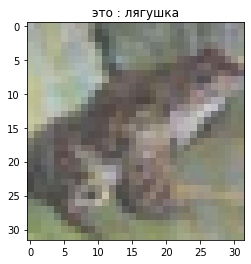

In [4]:
N = 140

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [5]:
data_augmentation = True

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 67s 35ms/step - loss: 2.1155 - accuracy: 0.2105 - val_loss: 1.9229 - val_accuracy: 0.3077
сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 2s 6ms/step - loss: 1.9229 - accuracy: 0.3077
Test loss: 1.9229414463043213
Test accuracy: 0.3077000081539154


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

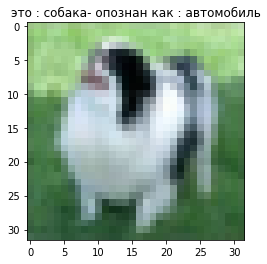

In [8]:
N = 141
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Вынесем определение параметров и обработку изображений.

In [16]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True

In [17]:
# Препроцессинг и data augmentation в реальном времени:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=5, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

Попробуем построить модель, которая будет объединением двух нитей со сверточными слоями.

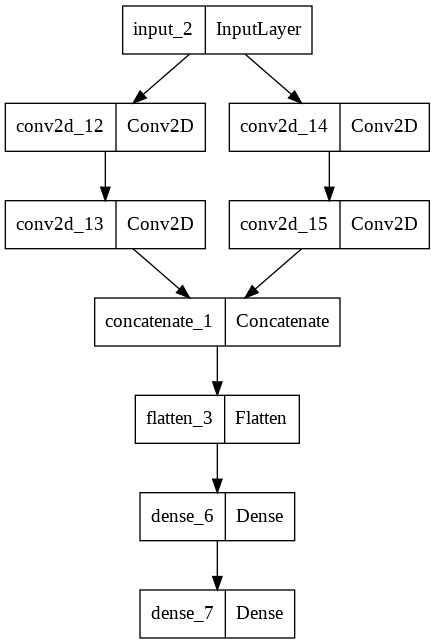

In [24]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
second_dense = x22

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense = Dense(512, activation='relu')(merge_flat)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_2stek = Model(inputs=first_input, outputs=merge_class)
# sgd_grad = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_2stek.compile(optimizer='SGD', 
                   loss=keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

plot_model(model_stek,'model_2stek.png')

In [28]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
  second_dense = x22

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])

Прогон 0:
1563/1563 [==============================] - 74s 47ms/step - loss: 1.7888 - accuracy: 0.3619 - val_loss: 1.6209 - val_accuracy: 0.4272
Прогон 1:
1563/1563 [==============================] - 71s 45ms/step - loss: 1.7616 - accuracy: 0.3701 - val_loss: 1.4345 - val_accuracy: 0.4935
Прогон 2:
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7723 - accuracy: 0.3629 - val_loss: 1.4974 - val_accuracy: 0.4722
Прогон 3:
1563/1563 [==============================] - 73s 46ms/step - loss: 1.7743 - accuracy: 0.3618 - val_loss: 1.5615 - val_accuracy: 0.4474
Прогон 4:
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7729 - accuracy: 0.3621 - val_loss: 1.4921 - val_accuracy: 0.4707


In [32]:
print(f'Метрика двухнитевой модели на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Метрика двухнитевой модели на тесте - 0.4622 +- 0.0228


Видно, что метрика модели улучшилась. Попробуем теперь добавить дополнительную нить и посмотреть каким образом это повлияет на результаты:

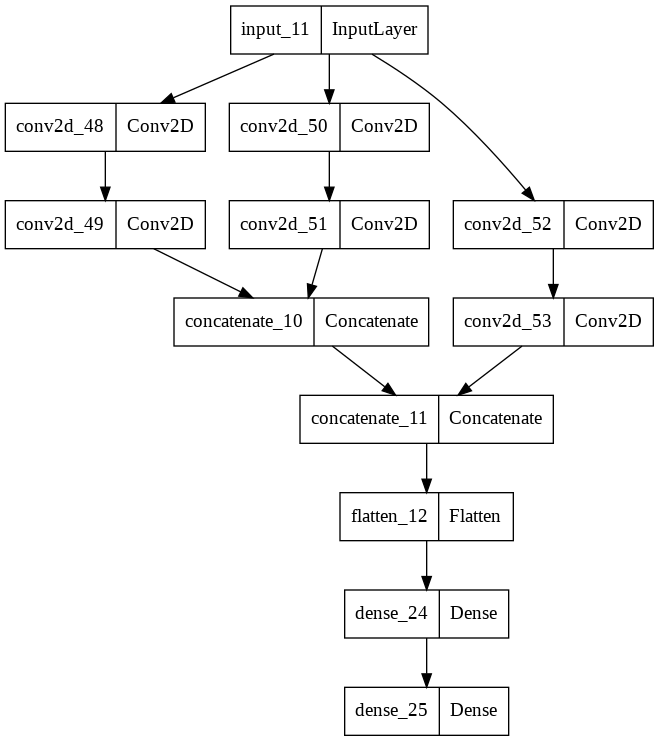

In [33]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
second_dense = x22

merge_one = Concatenate(axis =-1)([first_dense, second_dense])

x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


merge_two = Concatenate(axis = -1)([merge_one, x32])

merge = Flatten()(merge_two)
merge_dense = Dense(512, activation='relu')(merge)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_3stek = Model(inputs=first_input, outputs=merge_class)
model_3stek.compile(optimizer='SGD', 
                   loss=keras.losses.CategoricalCrossentropy(), 
                   metrics=['accuracy'])


plot_model(model_3stek,'model_stek_3.png')

In [34]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
  x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
  x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
  second_dense = x22

  merge_one = Concatenate(axis =-1)([first_dense, second_dense])

  x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
  x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


  merge_two = Concatenate(axis = -1)([merge_one, x32])

  merge = Flatten()(merge_two)
  merge_dense = Dense(512, activation='relu')(merge)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_3stek = Model(inputs=first_input, outputs=merge_class)
  model_3stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(), 
                    metrics=['accuracy'])
  
  hist = model_3stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_3stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])


print(f'Метрика трехнитевой модели на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Прогон 0:
1563/1563 [==============================] - 106s 67ms/step - loss: 1.7592 - accuracy: 0.3683 - val_loss: 1.4621 - val_accuracy: 0.4782
Прогон 1:
1563/1563 [==============================] - 106s 67ms/step - loss: 1.7924 - accuracy: 0.3578 - val_loss: 1.5296 - val_accuracy: 0.4614
Прогон 2:
1563/1563 [==============================] - 106s 68ms/step - loss: 1.7945 - accuracy: 0.3562 - val_loss: 1.5624 - val_accuracy: 0.4365
Прогон 3:
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8027 - accuracy: 0.3495 - val_loss: 1.4778 - val_accuracy: 0.4729
Прогон 4:
1563/1563 [==============================] - 106s 68ms/step - loss: 1.7966 - accuracy: 0.3578 - val_loss: 1.4841 - val_accuracy: 0.4798
Метрика трехнитевой модели на тесте - 0.4658 +- 0.0160


Как видим какого-либо значительного улучшения метрики при добавлении дополнительной нити сверточных уровней добиться не удалось.

Попробуем вернуться к двухнитевой модели и увеличить количество ядер.

In [35]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(64, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(128, 3, activation='relu', padding = 'same')(x11)
  first_dense = x12

  x21 = Conv2D(64, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(128, 5, activation='relu', padding = 'same')(x21)
  second_dense = x22

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])


print(f'Метрика двухнитевой модели с увеличенным количеством ядер на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Прогон 0:
1563/1563 [==============================] - 136s 86ms/step - loss: 1.7894 - accuracy: 0.3561 - val_loss: 1.5053 - val_accuracy: 0.4637
Прогон 1:
1563/1563 [==============================] - 135s 86ms/step - loss: 1.7625 - accuracy: 0.3675 - val_loss: 1.4383 - val_accuracy: 0.4862
Прогон 2:
1563/1563 [==============================] - 130s 83ms/step - loss: 1.7985 - accuracy: 0.3576 - val_loss: 1.5241 - val_accuracy: 0.4660
Прогон 3:
1563/1563 [==============================] - 130s 83ms/step - loss: 1.7785 - accuracy: 0.3633 - val_loss: 1.5082 - val_accuracy: 0.4475
Прогон 4:
1563/1563 [==============================] - 133s 85ms/step - loss: 1.7789 - accuracy: 0.3627 - val_loss: 1.4672 - val_accuracy: 0.4750
Метрика двухнитевой модели с увеличенным количеством ядер на тесте - 0.4677 +- 0.0128


Как видим снова значительного изменения точности по сравнению с обычной двухнитевой моделью добиться не удалось. Попробуем добавить дополнительный сверточный слой на каждую из нитей, сделав модель глубже.

In [36]:
final_scores = []
final_losses = []

for i in range(5):
  print(f'Прогон {i}:')

  first_input = Input(shape=x_train.shape[1:])
  x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
  x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
  x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
  first_dense = x13

  x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
  x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
  x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
  second_dense = x23

  merge = Concatenate(axis = -1)([first_dense, second_dense])

  merge_flat = Flatten()(merge)
  merge_dense = Dense(512, activation='relu')(merge_flat)
  merge_class = Dense(10, activation='softmax')(merge_dense)

  model_2stek = Model(inputs=first_input, outputs=merge_class)
  model_2stek.compile(optimizer='SGD', 
                      loss=keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])
  hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                         epochs = epochs, validation_data=(x_test, y_test))
  
  # проверка работы обученной модели
  scores = model_2stek.evaluate(x_test, y_test, verbose=0)
  final_scores.append(scores[1])
  final_losses.append(scores[0])

Прогон 0:
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7797 - accuracy: 0.3592 - val_loss: 1.4731 - val_accuracy: 0.4771
Прогон 1:
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7988 - accuracy: 0.3543 - val_loss: 1.4913 - val_accuracy: 0.4657
Прогон 2:
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7650 - accuracy: 0.3668 - val_loss: 1.5644 - val_accuracy: 0.4310
Прогон 3:
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7848 - accuracy: 0.3588 - val_loss: 1.4676 - val_accuracy: 0.4754
Прогон 4:
1563/1563 [==============================] - 149s 95ms/step - loss: 1.7778 - accuracy: 0.3596 - val_loss: 1.4696 - val_accuracy: 0.4822


In [37]:
print(f'Метрика двухнитевой модели с тремя слоями свертки на тесте - {np.average(final_scores):.4f} +- {np.std(final_scores):.4f}')

Метрика двухнитевой модели с тремя слоями свертки на тесте - 0.4663 +- 0.0184


Снова не удалось добиться каких-то значимых изменений. Попробуем увеличить количество эпох и посмотреть как это повлияет на метрику. Так как это значительно увеличит время расчета и ресурсы прогоним модель с увеличенным количеством эпох один раз. Увеличим также размер батча, чтобы модель считалась быстрее.

In [38]:
epochs = 10
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
first_dense = x13

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
second_dense = x23

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense = Dense(512, activation='relu')(merge_flat)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])
hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_2stek.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy - {scores[1]}')

Epoch 1/10
782/782 [==============================] - 108s 135ms/step - loss: 1.8728 - accuracy: 0.3293 - val_loss: 1.6313 - val_accuracy: 0.4139
Epoch 2/10
782/782 [==============================] - 105s 135ms/step - loss: 1.5786 - accuracy: 0.4362 - val_loss: 1.4358 - val_accuracy: 0.4920
Epoch 3/10
782/782 [==============================] - 105s 134ms/step - loss: 1.4372 - accuracy: 0.4865 - val_loss: 1.3760 - val_accuracy: 0.5132
Epoch 4/10
782/782 [==============================] - 105s 134ms/step - loss: 1.3373 - accuracy: 0.5223 - val_loss: 1.2341 - val_accuracy: 0.5535
Epoch 5/10
782/782 [==============================] - 105s 134ms/step - loss: 1.2695 - accuracy: 0.5457 - val_loss: 1.1401 - val_accuracy: 0.5936
Epoch 6/10
782/782 [==============================] - 105s 135ms/step - loss: 1.2080 - accuracy: 0.5730 - val_loss: 1.1006 - val_accuracy: 0.6053
Epoch 7/10
782/782 [==============================] - 105s 135ms/step - loss: 1.1526 - accuracy: 0.5921 - val_loss: 1.0523 -

Видим, что увеличение эпох крайне позитивно повлияло на качество нашей модели. Более того метрики на трейне/тесте позволяют утверждать, что можно и дальше наращивать число эпох, так как проблемы переобучения очевидно еще нет. Попробуем посмотреть какие значения показывает трехнитевая модель на сопоставимом количестве эпох.

In [39]:
batch_size=64
epochs=10

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3,activation='relu',padding = 'same')(first_input)
x12 = Conv2D(64, 3,activation='relu',padding = 'same')(x11)
first_dense = x12

x21 = Conv2D(32, 5,activation='relu',padding = 'same')(first_input)
x22 = Conv2D(64, 5,activation='relu',padding = 'same')(x21)
second_dense = x22

merge_one = Concatenate(axis =-1)([first_dense, second_dense])

x31 = Conv2D(32,1, activation='relu',padding = 'same')(first_input)
x32 = Conv2D(64,1, activation='relu',padding = 'same')(x31)


merge_two = Concatenate(axis = -1)([merge_one, x32])

merge = Flatten()(merge_two)
merge_dense = Dense(512, activation='relu')(merge)
merge_class = Dense(10, activation='softmax')(merge_dense)

model_3stek = Model(inputs=first_input, outputs=merge_class)
model_3stek.compile(optimizer='SGD', 
                  loss=keras.losses.CategoricalCrossentropy(), 
                  metrics=['accuracy'])

hist = model_3stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_3stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
782/782 [==============================] - 74s 93ms/step - loss: 1.8751 - accuracy: 0.3290 - val_loss: 1.7434 - val_accuracy: 0.3815
Epoch 2/10
782/782 [==============================] - 72s 93ms/step - loss: 1.5721 - accuracy: 0.4373 - val_loss: 1.4872 - val_accuracy: 0.4744
Epoch 3/10
782/782 [==============================] - 72s 92ms/step - loss: 1.4388 - accuracy: 0.4885 - val_loss: 1.2986 - val_accuracy: 0.5406
Epoch 4/10
782/782 [==============================] - 72s 92ms/step - loss: 1.3646 - accuracy: 0.5101 - val_loss: 1.2156 - val_accuracy: 0.5632
Epoch 5/10
782/782 [==============================] - 72s 92ms/step - loss: 1.3003 - accuracy: 0.5379 - val_loss: 1.1970 - val_accuracy: 0.5724
Epoch 6/10
782/782 [==============================] - 72s 92ms/step - loss: 1.2445 - accuracy: 0.5574 - val_loss: 1.1490 - val_accuracy: 0.5937
Epoch 7/10
782/782 [==============================] - 73s 93ms/step - loss: 1.1950 - accuracy: 0.5777 - val_loss: 1.1574 - val_accuracy:

Как видим результат трехнитевой модели меньшей глубины оказался сопоставим с метрикой более глубокой двухнитевой модели на сопоставимом количестве эпох. Попробуем вернуться к двухнитевой модели и добавить еще пулинговые слои после сверточных и дополнительный слой в полносвязной части.

In [40]:
epochs = 10
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
x14 = MaxPooling2D(pool_size=(2, 2))(x13)
first_dense = x14

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
x24 = MaxPooling2D(pool_size=(2, 2))(x23)
second_dense = x24

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense1 = Dense(512, activation='relu')(merge_flat)
merge_dense2 = Dense(128, activation='relu')(merge_dense1)
merge_class = Dense(10, activation='softmax')(merge_dense2)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])
hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
print('Test')
scores = model_2stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
782/782 [==============================] - 67s 84ms/step - loss: 1.9751 - accuracy: 0.2838 - val_loss: 1.6841 - val_accuracy: 0.3980
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 1.6384 - accuracy: 0.4149 - val_loss: 1.4515 - val_accuracy: 0.4874
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 1.4654 - accuracy: 0.4755 - val_loss: 1.3068 - val_accuracy: 0.5360
Epoch 4/10
782/782 [==============================] - 65s 83ms/step - loss: 1.3545 - accuracy: 0.5167 - val_loss: 1.2325 - val_accuracy: 0.5638
Epoch 5/10
782/782 [==============================] - 64s 82ms/step - loss: 1.2704 - accuracy: 0.5460 - val_loss: 1.1755 - val_accuracy: 0.5785
Epoch 6/10
782/782 [==============================] - 65s 83ms/step - loss: 1.1974 - accuracy: 0.5733 - val_loss: 1.1305 - val_accuracy: 0.5991
Epoch 7/10
782/782 [==============================] - 65s 83ms/step - loss: 1.1315 - accuracy: 0.5952 - val_loss: 1.0338 - val_accuracy:

Качество модели незначительно улучшилось, по-хорошему нужно еще дополнительно проверить насколько стабильно это улучшение. Однако опять же видим, что метрики на трейне/тесте указывают, что переобучения еще нет, и можно попробовать безболезненно увеличить количество эпох.

In [41]:
epochs = 20
batch_size = 64

first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, 3, activation='relu', padding = 'same')(first_input)
x12 = Conv2D(64, 3, activation='relu', padding = 'same')(x11)
x13 = Conv2D(128, 3, activation='relu', padding = 'same')(x12)
x14 = MaxPooling2D(pool_size=(2, 2))(x13)
first_dense = x14

x21 = Conv2D(32, 5, activation='relu', padding = 'same')(first_input)
x22 = Conv2D(64, 5, activation='relu', padding = 'same')(x21)
x23 = Conv2D(128, 5, activation='relu', padding = 'same')(x22)
x24 = MaxPooling2D(pool_size=(2, 2))(x23)
second_dense = x24

merge = Concatenate(axis = -1)([first_dense, second_dense])

merge_flat = Flatten()(merge)
merge_dense1 = Dense(512, activation='relu')(merge_flat)
merge_dense2 = Dense(128, activation='relu')(merge_dense1)
merge_class = Dense(10, activation='softmax')(merge_dense2)

model_2stek = Model(inputs=first_input, outputs=merge_class)
model_2stek.compile(optimizer='SGD', 
                    loss=keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

plot_model(model_2stek,'model_2stek.png')


hist = model_2stek.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_test, y_test))

# проверка работы обученной модели
print('Test')
scores = model_2stek.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
782/782 [==============================] - 66s 83ms/step - loss: 1.9352 - accuracy: 0.3044 - val_loss: 1.6616 - val_accuracy: 0.4078
Epoch 2/20
782/782 [==============================] - 65s 82ms/step - loss: 1.6117 - accuracy: 0.4227 - val_loss: 1.4599 - val_accuracy: 0.4736
Epoch 3/20
782/782 [==============================] - 65s 83ms/step - loss: 1.4490 - accuracy: 0.4798 - val_loss: 1.3221 - val_accuracy: 0.5298
Epoch 4/20
782/782 [==============================] - 65s 83ms/step - loss: 1.3419 - accuracy: 0.5191 - val_loss: 1.2131 - val_accuracy: 0.5600
Epoch 5/20
782/782 [==============================] - 65s 83ms/step - loss: 1.2679 - accuracy: 0.5464 - val_loss: 1.1680 - val_accuracy: 0.5858
Epoch 6/20
782/782 [==============================] - 65s 83ms/step - loss: 1.1980 - accuracy: 0.5722 - val_loss: 1.1327 - val_accuracy: 0.5954
Epoch 7/20
782/782 [==============================] - 65s 83ms/step - loss: 1.1403 - accuracy: 0.5921 - val_loss: 1.0538 - val_accuracy:

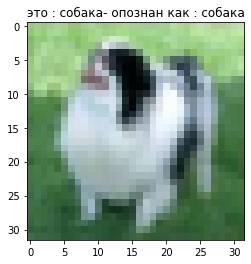

In [42]:
N = 141
y_p=model_2stek.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

В качестве дальнейших шагов улучшения модели можно рассмотреть еще большее увеличение количества эпох, пока метрики позволяют, и добавление дропаут слоев, чтобы предупредить проблему переобучения.